In [236]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Read file dataframe:

In [237]:
lol_df = pd.read_csv("lol_df.csv")

#### Top 20 champions with most voices:

In [266]:
voices = lol_df.filter(items=["champion","voice_line"])
voices = voices.groupby("champion")["voice_line"].count()

names_x = np.array(voices.sort_values(ascending=False).head(20).keys())
values_y = np.array(voices.sort_values(ascending=False).head(20))

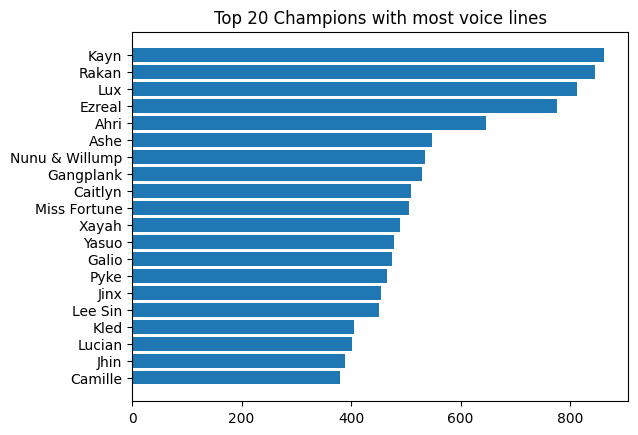

In [271]:
plt.barh(names_x, values_y)
plt.title('Top 20 Champions with most voice lines')
ax = plt.gca()
ax.invert_yaxis()
plt.show()